In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [45]:
metadata_filepath = r'metadata_of_normalized_and_feature_selected.csv'
data_filepath = r'normalized_and_feature_selected.csv'
metadata_df = pd.read_csv(metadata_filepath, index_col=0)
data_df = pd.read_csv(data_filepath, index_col=0)

In [46]:
y = metadata_df['smoke']
encoded_responses = [1 if response != 'never' else 0 for response in y]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(data_df, encoded_responses, test_size=0.2, random_state=42)

In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [50]:
y_pred = knn_model.predict(X_test_scaled)

In [51]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [52]:
print("KNN Model Evaluation:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

KNN Model Evaluation:
Accuracy: 0.7945823927765236
Precision: 0.8012651555086979
Recall: 0.8123997862105826


In [53]:
k_values = [3, 5, 7, 9, 11]
cv_scores = []
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

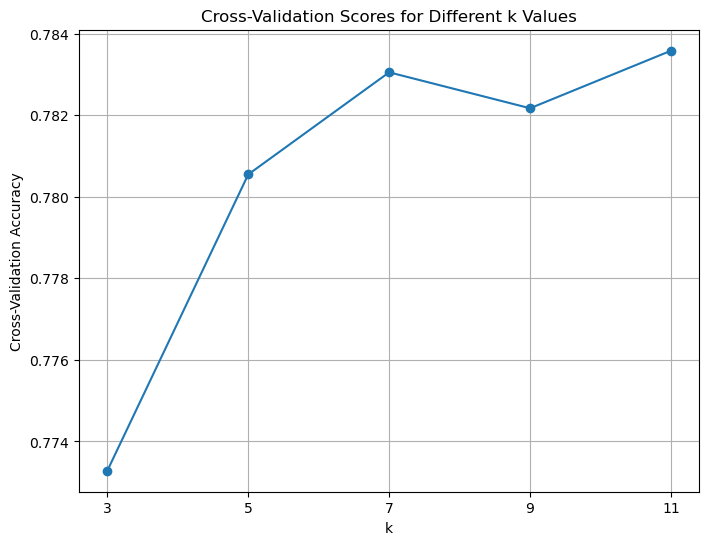

In [54]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-')
plt.title('Cross-Validation Scores for Different k Values')
plt.xlabel('k')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [55]:
optimal_k = k_values[cv_scores.index(max(cv_scores))]

print(f"Optimal k: {optimal_k}")

Optimal k: 11


In [56]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [57]:
k = 11
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=11)

In [58]:
h = .02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [62]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])

In [63]:
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])

In [64]:
Z = Z.reshape(xx.shape)

In [65]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

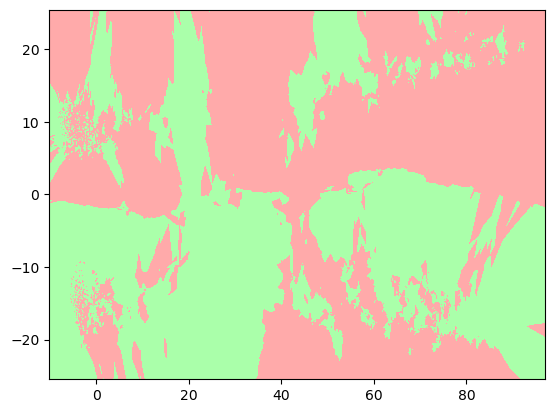

In [66]:
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

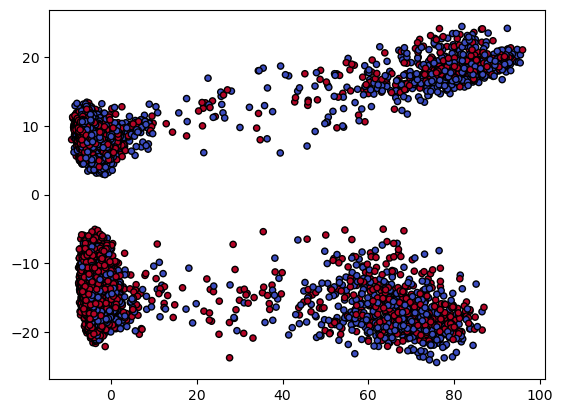

In [67]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k', s=20)

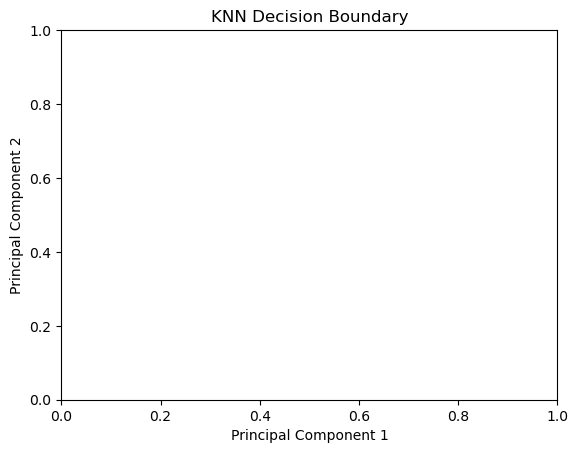

In [68]:
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Decision Boundary')
plt.show()

In [ ]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k', s=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Decision Boundary')
plt.show()